# Ortodromski problem (Great circle)

**author**: *aleksander.grm@fpp.uni-lj.si*,<br>
**date**: 2022

Pri analizi ortodromske plovbe ločimo v osnovi **dva** problema
- določitev razdalje $D_O$, kurza odhoda $\omega_0$ in položaja vrha $P_v$
- določitev položajev medtočk $P_m$ za plovbo po vmesnih loksodromah

Za oba problema si poglejmo izračun parametrov. V prvem primeru določimo vse parametre ortodrome in eno vmesno točko. V drugem primeru pa izračunamo vse vmesne točke in določimo razdaljo po loksodromah. Za oba primera še izrišemo potek plovbe.

Položaje vnašama v obliki, kot je v navtiki dogovor 

$\varphi = \#\#^\circ \, \#\#.\#' \, \mathrm{N/S}$, $\lambda = \#\#\#^\circ \, \#\#.\#' \, \mathrm{E/W}$, 

kjer imamo stopinje kot celo število in minute kot število na 1 decimalno mesto natančno.

Format vnosa položaja:
- LAT-$\varphi$ in LONG-$\lambda$ vnašamo v formatu [stopinje, minute, stran neba]

Primer vnosa položaja:
- $\varphi$: [12, 34.5, 'N']
- $\lambda$: [117, 12.6, 'W']
- stran neba mora biti v **enojnih navednicah**, kjer so dovoljeni znaki 'N', 'S', 'E', 'W'

In [1]:
# Nalaganje paketi za izračun loksodromoske plovbe
import os, sys

# nav tools path
sys.path.append('../nav_tools')

# needed by basemap
# os.environ['PROJ_LIB'] = '/opt/miniconda3/envs/python/share/proj'

In [2]:
import numpy as np
import navtools as nt
import rhumbline as rl
import greatcircle as gc

### Primer 1

In [3]:
# Položaj odhoda
fi0 = [45,33.6,'N']
la0 = [25,47.7,'E']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
fi1 = [37,17.8,'N']
la1 = [102,27.4,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d_gc, w1_gc, Pv] = gc.getGCparameters(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d_gc))
print('  course: {:.2f}{:s}'.format(w1_gc,nt.arc_deg))
print('  vertex:',nt.getPositionString(Pv))

departure: φ=45°33.60′N; λ=025°47.70′E
  arrival: φ=37°17.80′N; λ=102°27.40′W
----------------
distance: 5097.8Nm
  course: 321.16°
  vertex: φ=63°57.23′N; λ=034°18.73′W


In [4]:
# izračun posamezne medtočke
la_md = nt.nav2dd([50,0,'W'])
fi_md = gc.getMidPosition(P0,P1,la_md)
print('midpoint:', nt.getPositionString([fi_md, la_md]))

midpoint: φ=63°05.15′N; λ=050°00.00′W


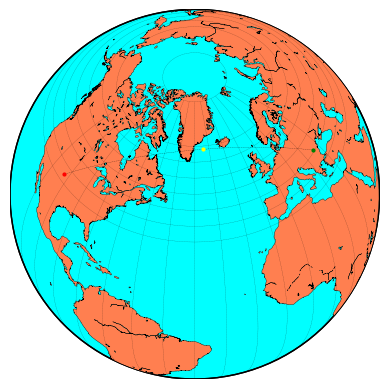

In [5]:
# izris ortodrome
P_gc = gc.getPathPoints(P0, P1)
nt.plotGCPath(P_gc,Pv,5,10,'gc_path_01.pdf')

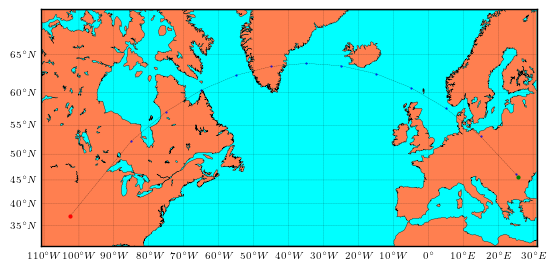

p[00]: φ=45°33.60′N; λ=025°47.70′E
p[01]: φ=46°14.41′N; λ=025°00.00′E; (0->1) ω=320.9°; d=52.6Nm
p[02]: φ=53°08.56′N; λ=015°00.00′E; (1->2) ω=316.9°; d=567.0Nm
p[03]: φ=57°43.22′N; λ=005°00.00′E; (2->3) ω=308.9°; d=437.1Nm
p[04]: φ=60°43.78′N; λ=005°00.00′W; (3->4) ω=300.5°; d=356.0Nm
p[05]: φ=62°37.30′N; λ=015°00.00′W; (4->5) ω=291.7°; d=306.4Nm
p[06]: φ=63°39.17′N; λ=025°00.00′W; (5->6) ω=282.9°; d=278.1Nm
p[07]: φ=63°57.13′N; λ=035°00.00′W; (6->7) ω=273.9°; d=265.5Nm
p[08]: φ=63°33.37′N; λ=045°00.00′W; (7->8) ω=264.9°; d=266.4Nm
p[09]: φ=62°25.00′N; λ=055°00.00′W; (8->9) ω=255.9°; d=280.9Nm
p[10]: φ=60°23.38′N; λ=065°00.00′W; (9->10) ω=247.0°; d=311.8Nm
p[11]: φ=57°11.82′N; λ=075°00.00′W; (10->11) ω=238.3°; d=364.9Nm
p[12]: φ=52°21.16′N; λ=085°00.00′W; (11->12) ω=229.9°; d=451.5Nm
p[13]: φ=37°17.80′N; λ=102°27.40′W; (12->13) ω=219.2°; d=1165.5Nm

distance-RL: 5103.6Nm; diff: 5.8Nm


In [6]:
# izris ortodrome v loksodromah
dla = 10 # vmesene točke na 5 stopinj
P_gc = gc.getPathPoints(P0, P1, dla)
nt.plotGCRLPath(P_gc,5,10,'gc_RL-path_01.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; ({:d}->{:d}) {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), i-1, i, nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))

### Primer 2

In [7]:
# Položaj odhoda
fi0 = [50,55,'N']
la0 = [7,32,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
# fi1 = [42,26,'N']
# la1 = [70,16,'W']
fi1 = [45,45,'N']
la1 = [53,24,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d_gc, w1_gc, Pv] = gc.getGCparameters(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d_gc))
print('  course: {:.2f}{:s}'.format(w1_gc,nt.arc_deg))
print('  vertex:',nt.getPositionString(Pv))

departure: φ=50°55.00′N; λ=007°32.00′W
  arrival: φ=45°45.00′N; λ=053°24.00′W
----------------
distance: 1825.1Nm
  course: 278.45°
  vertex: φ=51°25.22′N; λ=018°22.30′W


In [8]:
# izračun posamezne medtočke
la_md = nt.nav2dd([45,34.2,'W'])
fi_md = gc.getMidPosition(P0,P1,la_md)
print('midpoint:', nt.getPositionString([fi_md, la_md]))

midpoint: φ=48°06.71′N; λ=045°34.20′W


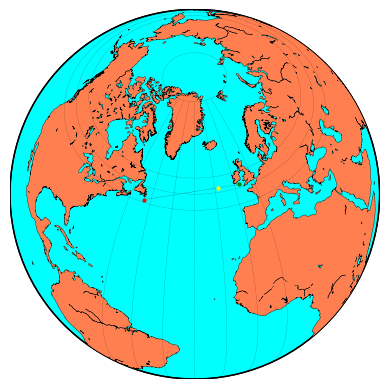

In [9]:
# izris ortodrome
P_gc = gc.getPathPoints(P0, P1)
nt.plotGCPath(P_gc,Pv,5,10,'gc_path_02.pdf')

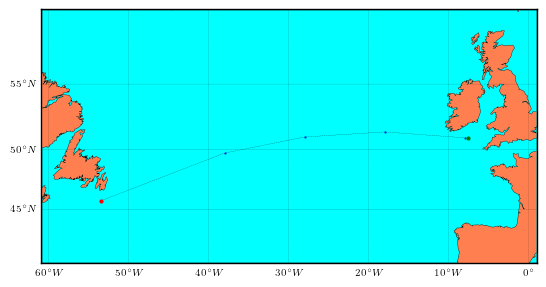

p[00]: φ=50°55.00′N; λ=007°32.00′W
p[01]: φ=50°57.57′N; λ=008°00.00′W; ω=278.3°; d=17.8Nm
p[02]: φ=51°25.19′N; λ=018°00.00′W; ω=274.2°; d=377.1Nm
p[03]: φ=51°01.41′N; λ=028°00.00′W; ω=266.4°; d=376.5Nm
p[04]: φ=49°44.28′N; λ=038°00.00′W; ω=258.6°; d=390.3Nm
p[05]: φ=45°45.00′N; λ=053°24.00′W; ω=248.9°; d=665.4Nm

distance-RL: 1827.1Nm; diff: 2.0Nm


In [10]:
# izris ortodrome v loksodromah
dla = 10 # vmesene točke na 10 stopinj
P_gc = gc.getPathPoints(P0, P1, dla)
nt.plotGCRLPath(P_gc,5,10,'gc_RL-path_02.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))

### Primer 3

In [11]:
# Položaj odhoda
fi0 = [32,33.6,'N']
la0 = [13,34.8,'W']
P0 = [nt.nav2dd(fi0),nt.nav2dd(la0)]

# Položaj prihoda
fi1 = [63,24.5,'S']
la1 = [72,22.3,'W']
P1 = [nt.nav2dd(fi1),nt.nav2dd(la1)]

# izračun 1.loksodromskega problema
# točen izračun z uporabo Merkatorjeve širine
[d_gc, w1_gc, Pv] = gc.getGCparameters(P0, P1)

# izpis vhodov in rezultatov
print('departure:',nt.getPositionString(P0))
print('  arrival:',nt.getPositionString(P1))
print('----------------')
print('distance: {:.1f}Nm'.format(d_gc))
print('  course: {:.2f}{:s}'.format(w1_gc,nt.arc_deg))
print('  vertex:',nt.getPositionString(Pv))

departure: φ=32°33.60′N; λ=013°34.80′W
  arrival: φ=63°24.50′S; λ=072°22.30′W
----------------
distance: 6396.3Nm
  course: 203.55°
  vertex: φ=70°19.37′S; λ=116°46.78′W


In [12]:
# izračun posamezne medtočke
la_md = nt.nav2dd([45,34.2,'W'])
fi_md = gc.getMidPosition(P0,P1,la_md)
print('midpoint:', nt.getPositionString([fi_md, la_md]))

midpoint: φ=42°00.63′S; λ=045°34.20′W


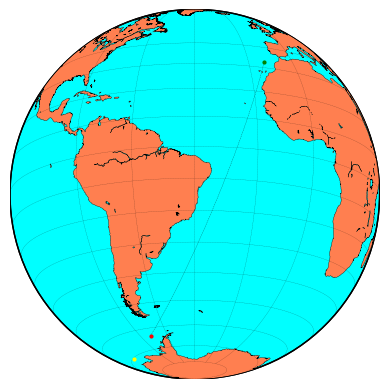

In [13]:
# izris ortodrome
P_gc = gc.getPathPoints(P0, P1)
nt.plotGCPath(P_gc,Pv,10,20,'gc_path_03.pdf')

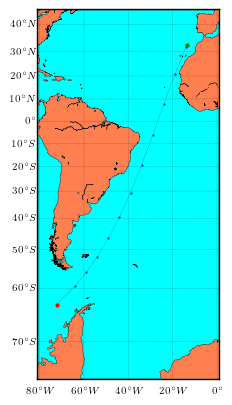

p[00]: φ=32°33.60′N; λ=013°34.80′W
p[01]: φ=31°44.38′N; λ=014°00.00′W; ω=203.4°; d=53.6Nm
p[02]: φ=20°43.99′N; λ=019°00.00′W; ω=202.1°; d=712.9Nm
p[03]: φ=07°43.37′N; λ=024°00.00′W; ω=200.4°; d=832.8Nm
p[04]: φ=06°11.00′S; λ=029°00.00′W; ω=199.7°; d=886.4Nm
p[05]: φ=19°21.90′S; λ=034°00.00′W; ω=200.3°; d=843.0Nm
p[06]: φ=30°37.33′S; λ=039°00.00′W; ω=201.9°; d=727.9Nm
p[07]: φ=39°37.21′S; λ=044°00.00′W; ω=204.4°; d=592.8Nm
p[08]: φ=46°36.07′S; λ=049°00.00′W; ω=207.6°; d=472.5Nm
p[09]: φ=51°58.92′S; λ=054°00.00′W; ω=211.2°; d=377.4Nm
p[10]: φ=56°09.01′S; λ=059°00.00′W; ω=215.1°; d=305.7Nm
p[11]: φ=59°24.52′S; λ=064°00.00′W; ω=219.3°; d=252.5Nm
p[12]: φ=63°24.50′S; λ=072°22.30′W; ω=225.0°; d=339.4Nm

distance-RL: 6397.0Nm; diff: 0.7Nm


In [14]:
# izris ortodrome v loksodromah
dla = 5 # vmesene točke na 5 stopinj
P_gc = gc.getPathPoints(P0, P1, dla)
nt.plotGCRLPath(P_gc,10,20,'gc_RL-path_03.pdf')

print('p[{:02d}]: {:s}'.format(0, nt.getPositionString(P_gc[0])))
d_sum = 0.0
for i in range(1,P_gc.shape[0]):
    [d, w] = rl.rhumbLineP1(P_gc[i-1], P_gc[i])
    d_sum += d
    print('p[{:02d}]: {:s}; {:s}={:.1f}{:s}; d={:.1f}Nm'.
          format(i, nt.getPositionString(P_gc[i]), nt.u_omega, w, nt.arc_deg,d))

print()    
print('distance-RL: {:.1f}Nm; diff: {:.1f}Nm'.format(d_sum, d_sum-d_gc))